<a href="https://colab.research.google.com/github/Harshitha1588/ADM-2025/blob/main/ADM_week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOGISTIC


In [91]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [92]:
diabetes_df = pd.read_csv('/content/Logistic Regression _diabetes-dataset.csv')

In [93]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [94]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [95]:
df.isnull().sum()

,0
age,0
experience,0
income,0


In [96]:
diabeties_df = diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'Age', 'SkinThickness','Insulin', 'Outcome']] # Include 'Outcome' column in diabeties_df
diabetes_df['Outcome'] = diabeties_df['Outcome'].astype('int') # Assuming "Outcome" is the target variable for diabetes
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
diabetes_df.shape

(768, 9)

In [98]:
X = np.asarray(diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Age']])
X[0:5]

array([[  6, 148,  72,  35,  50],
       [  1,  85,  66,  29,  31],
       [  8, 183,  64,   0,  32],
       [  1,  89,  66,  23,  21],
       [  0, 137,  40,  35,  33]])

In [99]:
y = np.asarray(diabetes_df['Outcome'])
y[0:5]

array([1, 0, 1, 0, 1])

In [100]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.64,  0.85,  0.15,  0.91,  1.43],
       [-0.84, -1.12, -0.16,  0.53, -0.19],
       [ 1.23,  1.94, -0.26, -1.29, -0.11],
       [-0.84, -1.  , -0.16,  0.15, -1.04],
       [-1.14,  0.5 , -1.5 ,  0.91, -0.02]])

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 5) (614,)
Test set: (154, 5) (154,)


#modeling

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [103]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [104]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.66, 0.34],
       [0.69, 0.31],
       [0.74, 0.26],
       [0.63, 0.37],
       [0.7 , 0.3 ],
       [0.45, 0.55],
       [0.42, 0.58],
       [0.56, 0.44],
       [0.31, 0.69],
       [0.65, 0.35],
       [0.63, 0.37],
       [0.75, 0.25],
       [0.66, 0.34],
       [0.78, 0.22],
       [0.65, 0.35],
       [0.57, 0.43],
       [0.27, 0.73],
       [0.34, 0.66],
       [0.72, 0.28],
       [0.78, 0.22],
       [0.75, 0.25],
       [0.44, 0.56],
       [0.65, 0.35],
       [0.38, 0.62],
       [0.61, 0.39],
       [0.58, 0.42],
       [0.79, 0.21],
       [0.57, 0.43],
       [0.66, 0.34],
       [0.64, 0.36],
       [0.46, 0.54],
       [0.81, 0.19],
       [0.55, 0.45],
       [0.8 , 0.2 ],
       [0.51, 0.49],
       [0.51, 0.49],
       [0.58, 0.42],
       [0.56, 0.44],
       [0.63, 0.37],
       [0.51, 0.49],
       [0.42, 0.58],
       [0.63, 0.37],
       [0.78, 0.22],
       [0.33, 0.67],
       [0.65, 0.35],
       [0.69, 0.31],
       [0.63, 0.37],
       [0.25,

#evaluation

In [105]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.49206349206349204

In [106]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[31 21]
 [11 91]]


Confusion matrix, without normalization
[[31 21]
 [11 91]]


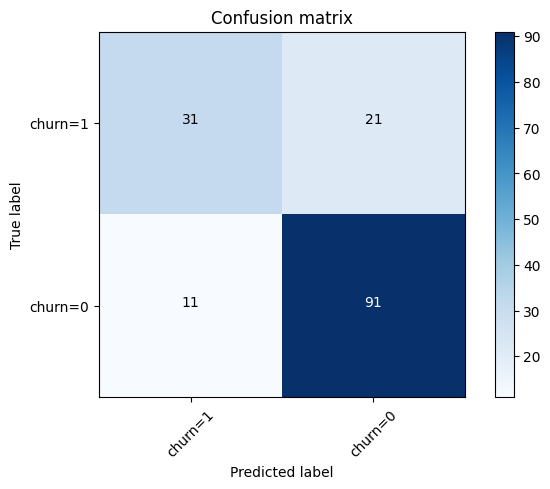

In [107]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [108]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       102
           1       0.74      0.60      0.66        52

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.76       154
weighted avg       0.79      0.79      0.79       154



In [109]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5274455785250751

In [110]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.51


#MULTIPLE_LINERA


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [112]:
df = pd.read_csv("/content/multiple_linear_regression_dataset.csv")

In [113]:
df

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [114]:

df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [115]:
df.shape

(20, 3)

In [116]:
print(df.corr())

                 age  experience    income
age         1.000000    0.615165  0.532204
experience  0.615165    1.000000  0.984227
income      0.532204    0.984227  1.000000


In [117]:
print(df.describe())

             age  experience        income
count  20.000000   20.000000     20.000000
mean   39.650000    6.200000  40735.500000
std    10.027725    4.124382   8439.797625
min    23.000000    1.000000  27840.000000
25%    31.500000    3.750000  35452.500000
50%    40.000000    5.000000  40190.000000
75%    47.000000    9.000000  45390.000000
max    58.000000   17.000000  63600.000000


In [118]:
X = df[['age', 'experience']]
y = df['income']

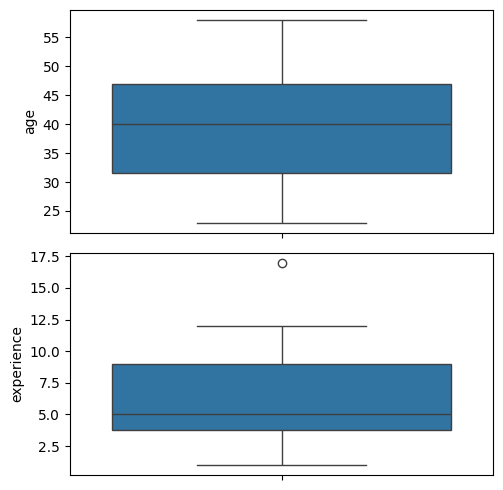

In [119]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['age'], ax = axs[0])
plt2 = sns.boxplot(df['experience'], ax = axs[1])
plt.tight_layout()

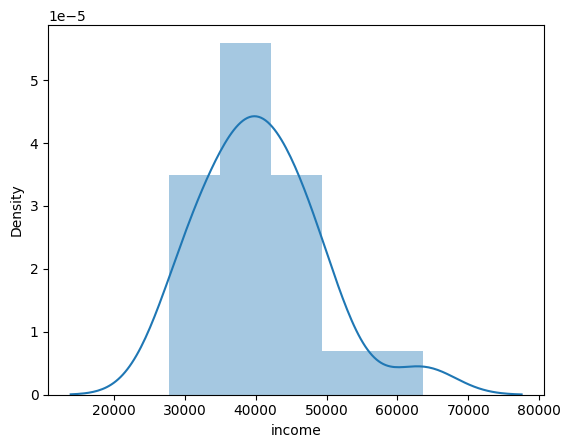

In [120]:
sns.distplot(df['income']);

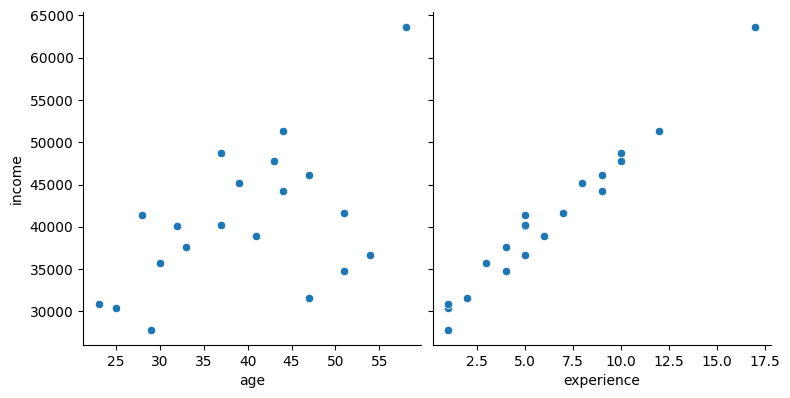

In [121]:
sns.pairplot(df, x_vars=['age', 'experience'], y_vars='income', height=4, aspect=1, kind='scatter')
plt.show()

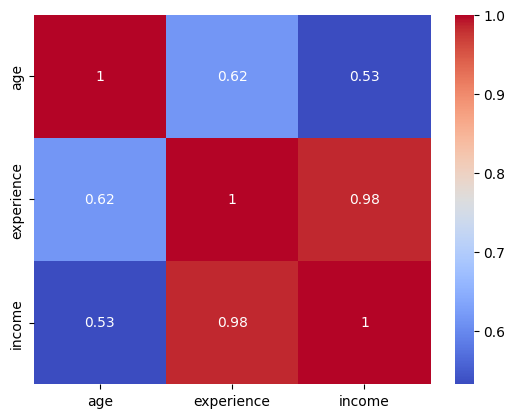

In [122]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [123]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [124]:
y_train.shape

(14,)

In [125]:
y_test.shape

(6,)

In [126]:
reg_model = linear_model.LinearRegression()

In [127]:
reg_model = LinearRegression().fit(X_train, y_train)

In [128]:
print('Intercept: ',reg_model.intercept_)
list(zip(X, reg_model.coef_))

Intercept:  30510.643844104634


[('age', -79.68088640690299), ('experience', 2167.573549181646)]

In [129]:
y_pred= reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)

In [130]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [30845.56 49238.19 46273.8  46512.85 35117.21 39117.45]


In [131]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
17,30870,30845.557006
19,48700,49238.186539
11,46110,46273.804126
18,44190,46512.846785
13,34800,35117.212834
6,41340,39117.446771


In [132]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 931.5077511414116
Mean Square Error: 1792176.3379165696
Root Mean Square Error: 1338.7219046226776


#SIMPLE_LINEAR


In [133]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
salary_df= pd.DataFrame(pd.read_csv("/content/SLR_Salary_dataset.csv"))

In [135]:
salary_df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [136]:
salary_df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [137]:
salary_df.shape

(30, 3)

In [138]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [139]:
salary_df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [140]:
salary_df.isnull().sum()*100/salary_df.shape[0]

,0
Unnamed: 0,0.0
YearsExperience,0.0
Salary,0.0


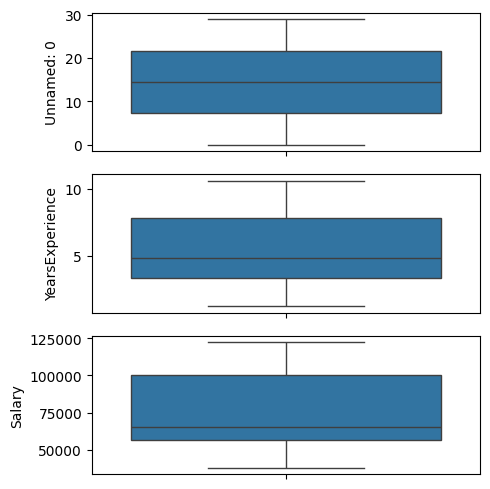

In [141]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(salary_df['Unnamed: 0'], ax = axs[0]) # Changed 'unnamed' to 'Unnamed: 0'
plt2 = sns.boxplot(salary_df['YearsExperience'], ax = axs[1]) # Changed 'yearsexperience' to 'YearsExperience'
plt3 = sns.boxplot(salary_df['Salary'], ax = axs[2]) # Changed 'salaryg' to 'salary' and 'sal' to 'Salary', assuming 'salaryg' was a typo and 'Salary' is the correct column name
plt.tight_layout()

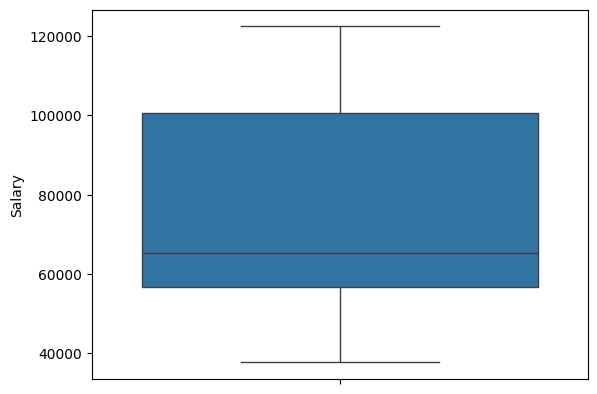

In [142]:
sns.boxplot(salary_df['Salary']) # Replace 'Sales' with 'Salary'
plt.show()

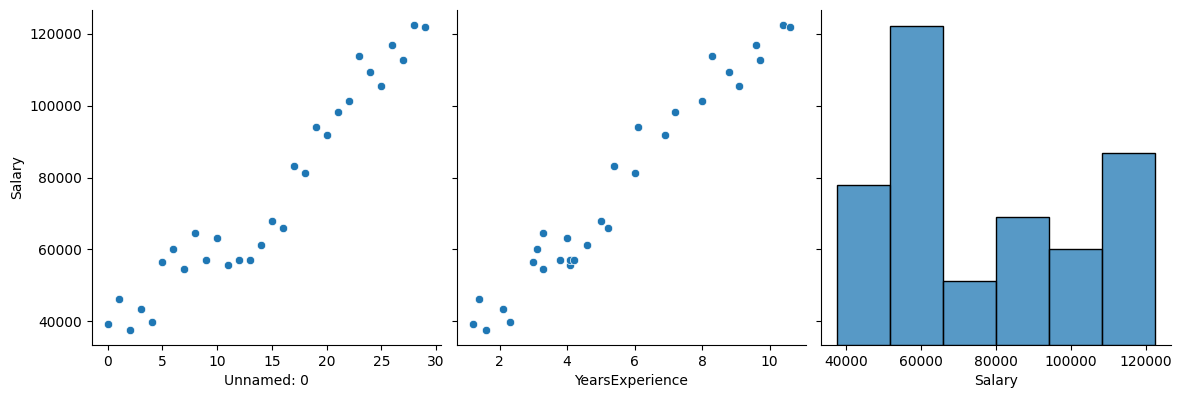

In [143]:
sns.pairplot(salary_df, x_vars=['Unnamed: 0', 'YearsExperience', 'Salary'], y_vars='Salary', height=4, aspect=1, kind='scatter') # Changed 'advertising' to 'salary_df', 'unnamed' to 'Unnamed: 0', 'yearsexperience' to 'YearsExperience', and 'salary' to 'Salary' to match the actual column names
plt.show()

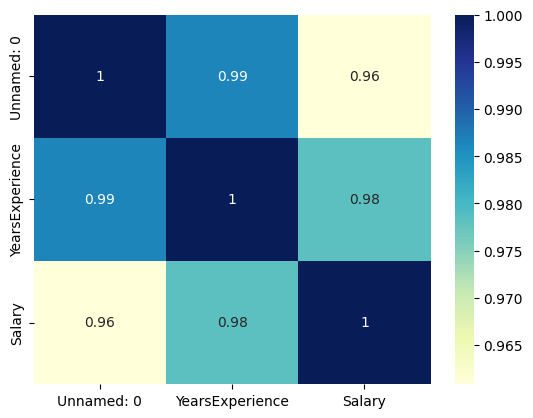

In [144]:
sns.heatmap(salary_df.corr(), cmap="YlGnBu", annot = True)
plt.show()


In [145]:
X = salary_df['Unnamed: 0']
y = salary_df['YearsExperience']

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [147]:
X_train.head()

,Unnamed: 0
17,17
22,22
11,11
4,4
29,29


In [148]:
y_train.head()

,YearsExperience
17,5.4
22,8.0
11,4.1
4,2.3
29,10.6


In [149]:
import statsmodels.api as sm

In [150]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [151]:
lr.params

,0
const,0.880316
Unnamed: 0,0.306033


In [152]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:        YearsExperience   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     715.0
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.54e-16
Time:                        15:35:48   Log-Likelihood:                -11.271
No. Observations:                  21   AIC:                             26.54
Df Residuals:                      19   BIC:                             28.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8803      0.182      4.848      0.0

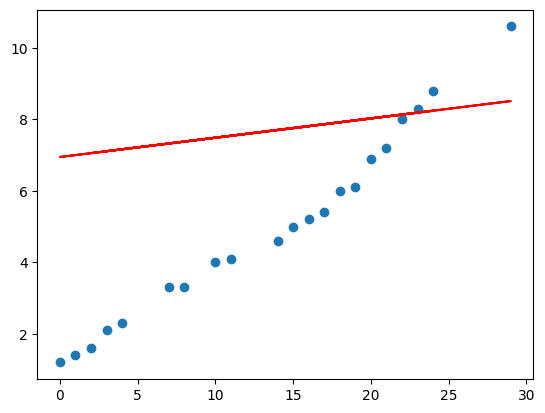

In [153]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [154]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

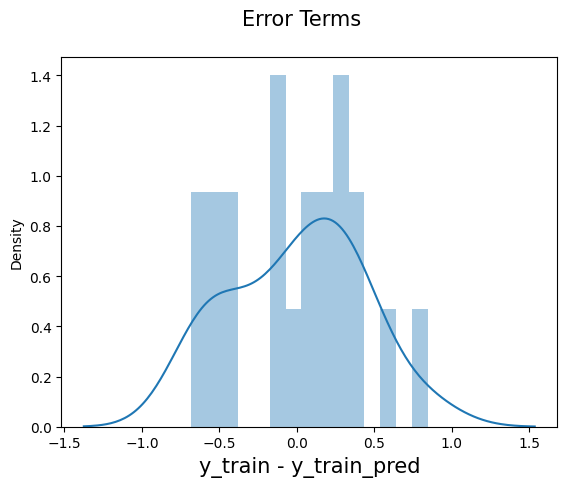

In [155]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

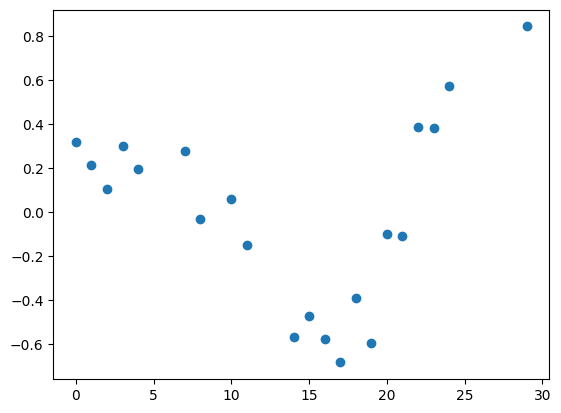

In [156]:
plt.scatter(X_train,res)
plt.show()

In [157]:

X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [158]:
y_pred.head()

,0
9,3.634613
26,8.837173
28,9.449239
13,4.858745
5,2.410481


In [159]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [160]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.6037210963979407

In [161]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9608180547046896

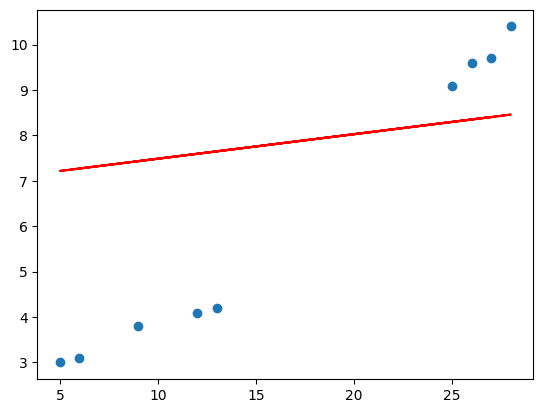

In [162]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()